# Machine Learning Engineer Challenge

## Property price prediction

### Libraries to use

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Data reading

In [32]:
df = pd.read_csv('https://fsl-assessment-public-files.s3.amazonaws.com/ai-challenge/train.csv')
df.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+


### Exploratory data analysis

Dtypes

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000

Null values

In [34]:
df.isna().sum()

uid                           0
city                          0
description                   1
homeType                      0
latitude                      0
longitude                     0
garageSpaces                  0
hasSpa                        0
yearBuilt                     0
numOfPatioAndPorchFeatures    0
lotSizeSqFt                   0
avgSchoolRating               0
MedianStudentsPerTeacher      0
numOfBathrooms                0
numOfBedrooms                 0
priceRange                    0
dtype: int64

Let's change some values and drop unnecessary columns

In [35]:
df['age'] = df['yearBuilt'].max() - df['yearBuilt']
df['len_description'] = df['description'].str.len()
df.drop(columns=['uid', 'description'], inplace=True)
df['numOfBathrooms'] = df['numOfBathrooms'].astype('int64')
df['hasSpa'] = df['hasSpa'].map({True:1, False:0})

is it MedianStudentsPerTeacher discrete?

In [36]:
np.unique(df['MedianStudentsPerTeacher'])

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Categorical variables

In [37]:
for column in df.select_dtypes('object').columns:
    print(f"Column {column}\n{df[column].value_counts()}\n")

Column city
city
austin              9898
del valle             57
pflugerville          29
driftwood              8
manchaca               3
dripping springs       3
west lake hills        2
Name: count, dtype: int64

Column homeType
homeType
Single Family            9427
Condo                     333
Townhouse                 113
Multiple Occupancy         60
Residential                27
Apartment                  19
Mobile / Manufactured      10
MultiFamily                 5
Vacant Land                 4
Other                       2
Name: count, dtype: int64

Column priceRange
priceRange
250000-350000    2356
350000-450000    2301
450000-650000    2275
650000+          1819
0-250000         1249
Name: count, dtype: int64



Discrete variables

In [38]:
for column in df.select_dtypes('int').columns:
    print(f"Column {column}\n{df[column].value_counts()}\n")

Column garageSpaces
garageSpaces
0     4458
2     3665
1      733
3      631
4      386
6       55
5       47
8        9
10       6
7        5
9        2
12       2
22       1
Name: count, dtype: int64

Column hasSpa
hasSpa
0    9175
1     825
Name: count, dtype: int64

Column yearBuilt
yearBuilt
2006    320
1999    272
2005    262
2007    258
1983    225
       ... 
1911      1
1905      1
1916      1
1943      1
1908      1
Name: count, Length: 113, dtype: int64

Column numOfPatioAndPorchFeatures
numOfPatioAndPorchFeatures
0    6072
1    1977
2    1331
3     479
4     117
5      19
6       3
7       1
8       1
Name: count, dtype: int64

Column MedianStudentsPerTeacher
MedianStudentsPerTeacher
16    2563
14    2139
15    1487
17    1236
13    1099
12     556
18     460
11     431
10      25
19       4
Name: count, dtype: int64

Column numOfBathrooms
numOfBathrooms
2     4116
3     3587
4     1273
1      636
5      254
6       89
7       35
8        8
10       2
Name: count, dtype: in

Numerical variables

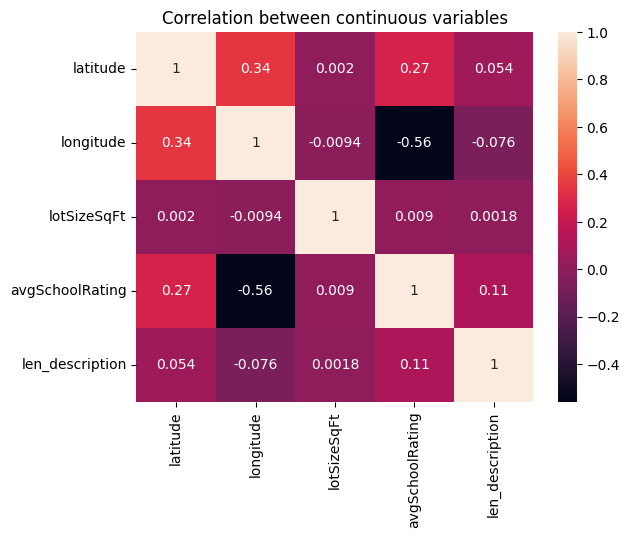

In [9]:
corr = df.select_dtypes('float').corr()
plt.title('Correlation between continuous variables')
sns.heatmap(corr, annot=True)
plt.show()

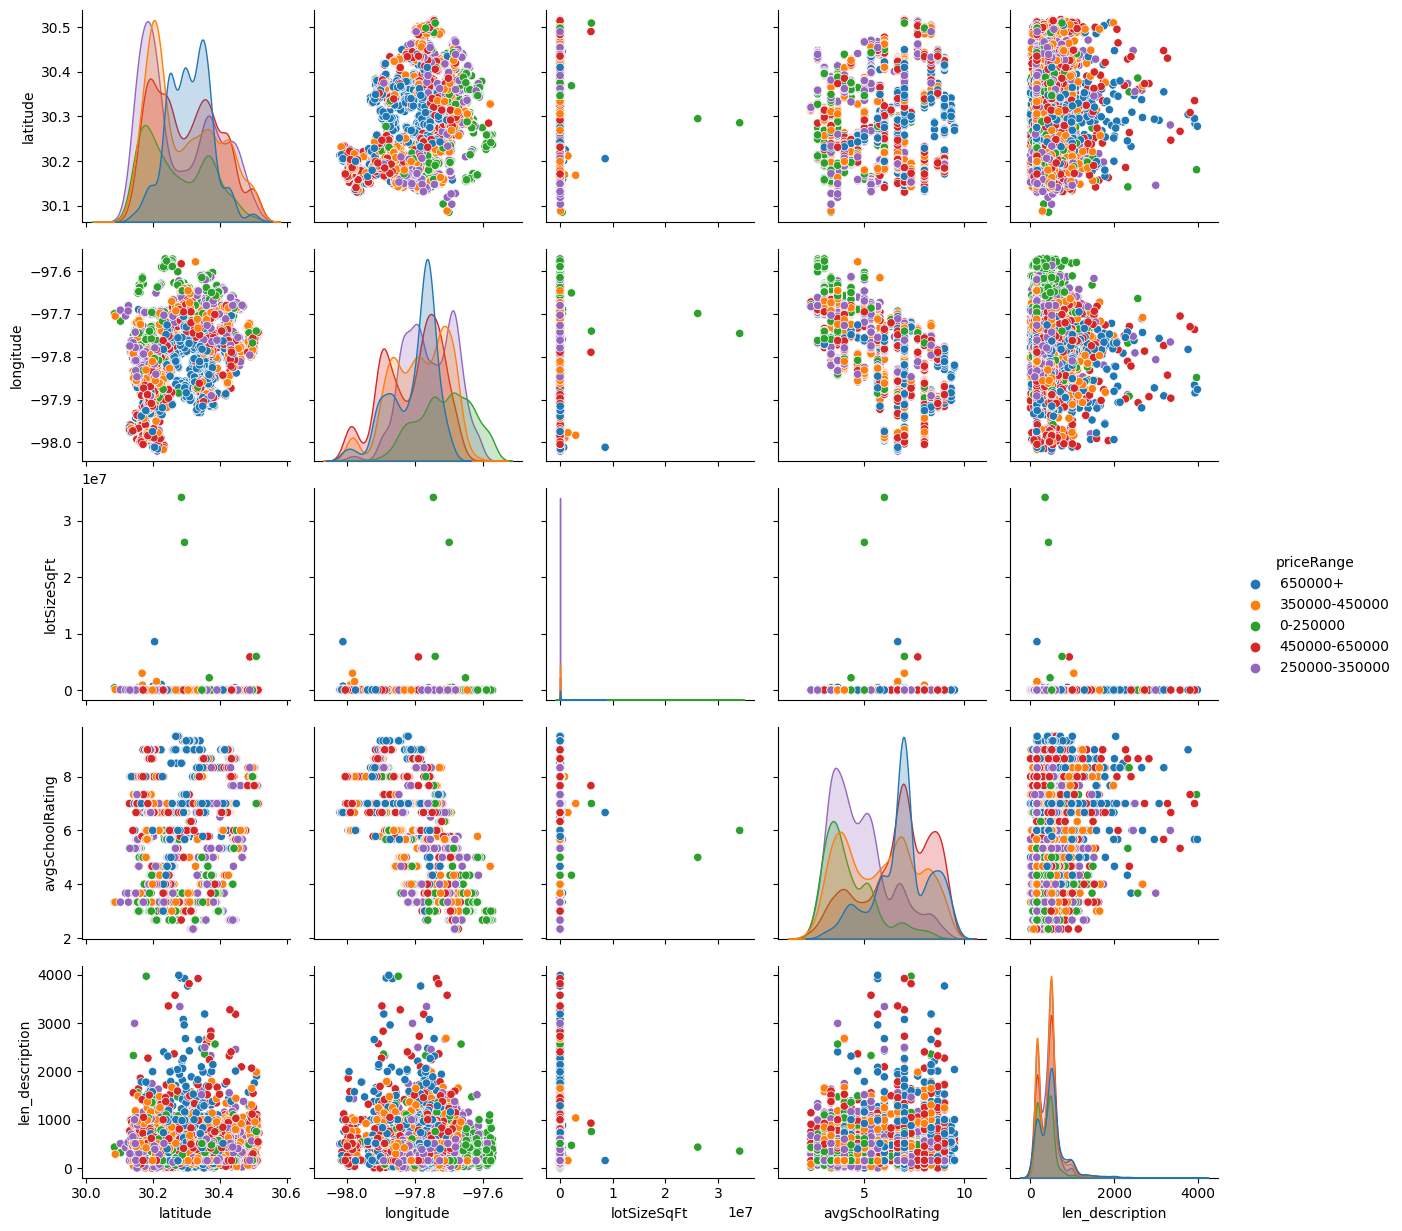

In [10]:
sns.pairplot(data = df, vars=df.select_dtypes('float').columns.tolist(), hue = 'priceRange')
plt.show()

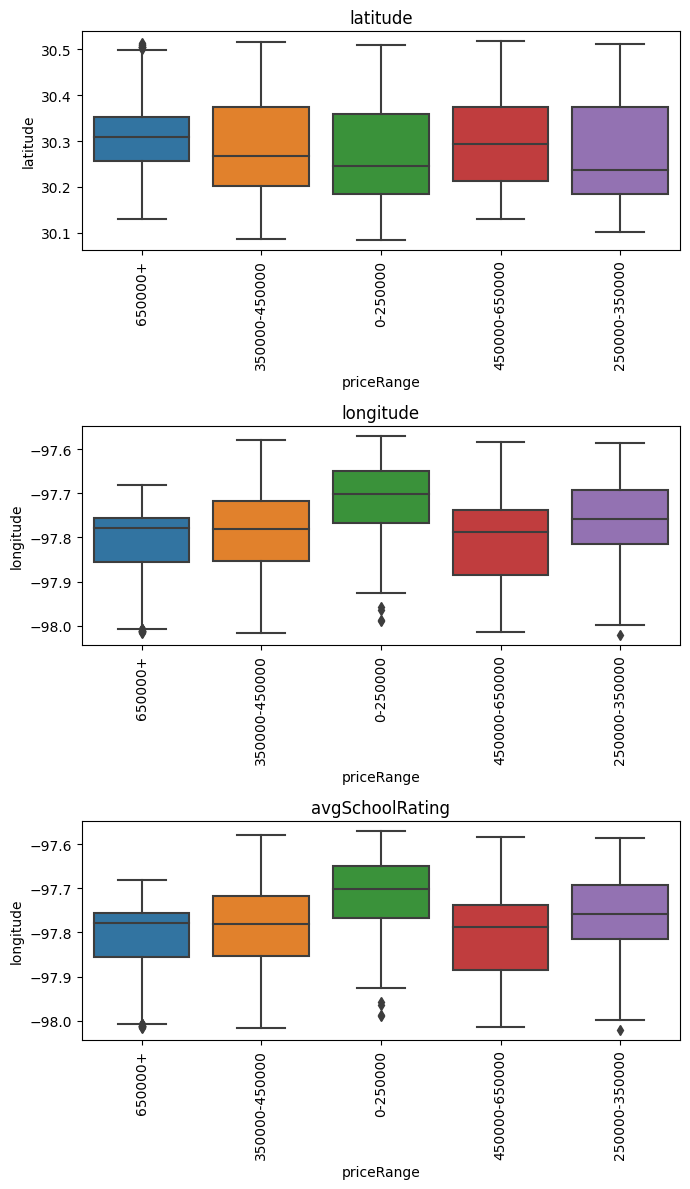

In [13]:
plt.figure(figsize=(7,12))
sns.boxplot(data =  df, x = 'priceRange', y = 'latitude', ax = plt.subplot(3,1,1))
plt.title('latitude')
plt.xticks(rotation = 90)
sns.boxplot(data =  df, x = 'priceRange', y = 'longitude', ax = plt.subplot(3,1,2))
plt.title('longitude')
plt.xticks(rotation = 90)
sns.boxplot(data =  df, x = 'priceRange', y = 'longitude', ax = plt.subplot(3,1,3))
plt.title('avgSchoolRating')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [39]:
df.dropna(inplace=True)

### Feature selection

In [19]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

num_cols = df.select_dtypes('number').drop(columns=['hasSpa'])
cat_cols = df.drop(columns=num_cols.columns.tolist())
cat_cols.drop(columns = ['priceRange'], inplace = True)
y = df.priceRange.values

Numerical variables

In [22]:
test1 = SelectKBest(f_classif, k = 8)
test1.fit(num_cols, y)
best_nums_test = test1.get_feature_names_out()
best_nums = df[best_nums_test]

Categorical Variables

In [24]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder().set_output(transform='pandas')
encoded = encoder.fit_transform(cat_cols)

test2 = SelectKBest(chi2, k = 2)
test2.fit(encoded, y)
best_cats_test = test2.get_feature_names_out()
best_cats = df[best_cats_test]

In [30]:
df2 = pd.concat([best_nums, best_cats], axis=1)
df2['priceRange'] = y

### Baseline

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

df3 =  df2.copy()
to_scale = df3.select_dtypes('number').columns.tolist()
price_dict = {'0-250000':0, '250000-350000':1,'350000-450000':2, '450000-650000':3,'650000+':4}
df3['priceRange'] = df3['priceRange'].map(price_dict)

transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['city']),
    ('scaler', MinMaxScaler(), to_scale)
], verbose_feature_names_out=False).set_output(transform='pandas')

X = df3.drop(columns=['priceRange'])
X = transformer.fit_transform(X)
y = df3.priceRange.values

X_train, X_test, y_train, y_test = train_test_split(X,y)

Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.28      0.38       326
           1       0.39      0.61      0.47       570
           2       0.32      0.28      0.30       536
           3       0.41      0.40      0.41       608
           4       0.55      0.46      0.50       460

    accuracy                           0.42      2500
   macro avg       0.45      0.41      0.41      2500
weighted avg       0.43      0.42      0.41      2500



Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,5,9,15], 'min_samples_split':[2,4,6,8]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, return_train_score=False, n_jobs=-1, scoring='balanced_accuracy')
grid.fit(X_train, y_train)
pd.DataFrame(grid.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.042698,0.003931,0.007052,0.001968,9,4,"{'max_depth': 9, 'min_samples_split': 4}",0.529220,0.502992,0.513146,0.487036,0.490394,0.504557,0.015441,1
11,0.052660,0.006674,0.009057,0.004385,9,8,"{'max_depth': 9, 'min_samples_split': 8}",0.528406,0.503006,0.511372,0.484354,0.490643,0.503556,0.015585,2
8,0.044908,0.005624,0.006305,0.001249,9,2,"{'max_depth': 9, 'min_samples_split': 2}",0.526413,0.503862,0.511290,0.484816,0.486250,0.502526,0.015670,3
10,0.044344,0.004280,0.006438,0.002606,9,6,"{'max_depth': 9, 'min_samples_split': 6}",0.525077,0.504207,0.512707,0.485272,0.484395,0.502332,0.015756,4
14,0.057733,0.009623,0.005436,0.001398,15,6,"{'max_depth': 15, 'min_samples_split': 6}",0.489884,0.489691,0.505925,0.483044,0.481699,0.490049,0.008614,5


SVC

In [53]:
from sklearn.svm import SVC

param_grid2 = {'kernel':['linear', 'rbf', 'sigmoid'], 'C':[1,5,10], 'gamma':[15,50,100]}
grid2 = GridSearchCV(SVC(), param_grid=param_grid2, cv=5, return_train_score=False, n_jobs=-1, scoring='balanced_accuracy')
grid2.fit(X_train, y_train)
pd.DataFrame(grid2.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,9.792120,2.630631,1.806861,0.579915,1,50,rbf,"{'C': 1, 'gamma': 50, 'kernel': 'rbf'}",0.504756,0.511930,0.524633,0.498405,0.493593,0.506663,0.010893,1
10,7.434808,0.433344,1.574797,0.054306,5,15,rbf,"{'C': 5, 'gamma': 15, 'kernel': 'rbf'}",0.508987,0.502731,0.524053,0.489576,0.483666,0.501803,0.014325,2
19,9.709791,1.872036,1.627953,0.183745,10,15,rbf,"{'C': 10, 'gamma': 15, 'kernel': 'rbf'}",0.509973,0.499283,0.519982,0.494723,0.477633,0.500319,0.014331,3
1,8.674102,1.756794,1.886406,0.433182,1,15,rbf,"{'C': 1, 'gamma': 15, 'kernel': 'rbf'}",0.497039,0.492598,0.498195,0.487183,0.477810,0.490565,0.007462,4
13,8.990390,0.323776,1.444548,0.251644,5,50,rbf,"{'C': 5, 'gamma': 50, 'kernel': 'rbf'}",0.486290,0.486255,0.501374,0.477991,0.470686,0.484519,0.010239,5


Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

param_grid3 = {'n_estimators':[100, 150, 200, 250], 'max_depth':[15,20,25], 'min_samples_split':[8,10,12]}
grid3 = GridSearchCV(RandomForestClassifier(), param_grid=param_grid3, cv=5, return_train_score=False, n_jobs=-1, scoring='balanced_accuracy')
grid3.fit(X_train, y_train)
pd.DataFrame(grid3.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
27,4.343190,1.160373,0.311860,0.083033,25,8,250,"{'max_depth': 25, 'min_samples_split': 8, 'n_e...",0.551265,0.546913,0.546826,0.534013,0.526469,0.541097,0.009319,1
26,3.405255,0.785353,0.245763,0.076365,25,8,200,"{'max_depth': 25, 'min_samples_split': 8, 'n_e...",0.553192,0.546155,0.551062,0.521722,0.526047,0.539635,0.013133,2
25,2.589953,0.768668,0.180579,0.054974,25,8,150,"{'max_depth': 25, 'min_samples_split': 8, 'n_e...",0.553655,0.542530,0.542838,0.530979,0.524477,0.538896,0.010170,3
14,3.506612,0.973220,0.226176,0.043383,20,8,200,"{'max_depth': 20, 'min_samples_split': 8, 'n_e...",0.550285,0.546249,0.540692,0.527258,0.528166,0.538530,0.009348,4
13,2.680616,0.719873,0.178294,0.043981,20,8,150,"{'max_depth': 20, 'min_samples_split': 8, 'n_e...",0.548189,0.541348,0.551603,0.531581,0.519191,0.538382,0.011784,5


### Results with test data

Decision tree

In [55]:
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.37      0.47       326
           1       0.52      0.52      0.52       570
           2       0.41      0.47      0.44       536
           3       0.49      0.46      0.48       608
           4       0.61      0.72      0.66       460

    accuracy                           0.51      2500
   macro avg       0.54      0.51      0.51      2500
weighted avg       0.52      0.51      0.51      2500



SVC

In [56]:
best_svc = grid2.best_estimator_
best_svc.fit(X_train, y_train)
print(classification_report(y_test, best_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49       326
           1       0.48      0.59      0.53       570
           2       0.43      0.45      0.44       536
           3       0.52      0.51      0.51       608
           4       0.64      0.65      0.64       460

    accuracy                           0.52      2500
   macro avg       0.55      0.52      0.52      2500
weighted avg       0.53      0.52      0.52      2500



Random Forest Classifier

In [57]:
best_rfc = grid3.best_estimator_
best_rfc.fit(X_train, y_train)
print(classification_report(y_test, best_rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.45      0.54       326
           1       0.52      0.63      0.57       570
           2       0.44      0.49      0.46       536
           3       0.58      0.50      0.54       608
           4       0.69      0.72      0.70       460

    accuracy                           0.56      2500
   macro avg       0.58      0.56      0.56      2500
weighted avg       0.57      0.56      0.56      2500



### Best model to production

We can select Random Forest Classifier

Pipeline

In [58]:
df3 =  df2.copy()
to_scale = df3.select_dtypes('number').columns.tolist()
price_dict = {'0-250000':0, '250000-350000':1,'350000-450000':2, '450000-650000':3,'650000+':4}
df3['priceRange'] = df3['priceRange'].map(price_dict)

transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['city']),
    ('scaler', MinMaxScaler(), to_scale)
], verbose_feature_names_out=False).set_output(transform='pandas')

X = df3.drop(columns=['priceRange'])
y = df3.priceRange.values

In [59]:
rfc = grid3.best_estimator_

In [60]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('transformer', transformer),
    ('model', rfc)
])
pipeline.fit(X, y)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['city']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['longitude', 'garageSpaces',
                                                   'numOfPatioAndPorchFeatures',
                                                   'avgSchoolRating',
                                                   'MedianStudentsPerTeacher',
                                                   'numOfBathrooms',
                                                   'numOfBedrooms',
                                                   'len_description',
                                                   'hasSpa'])],
                                   verbose_feature_names_out=False)),
                ('model',
                 RandomForestClassifier(max_depth=25, min_samples_split=8,
                                        n_estimators=250))])

### Feauture importance

In [70]:
importance = pd.DataFrame([pipeline[1].feature_names_in_, pipeline[1].feature_importances_]).T.rename(columns={0:'feature', 1:'importance'})
importance.sort_values(by = 'importance', ascending=True, inplace=True)

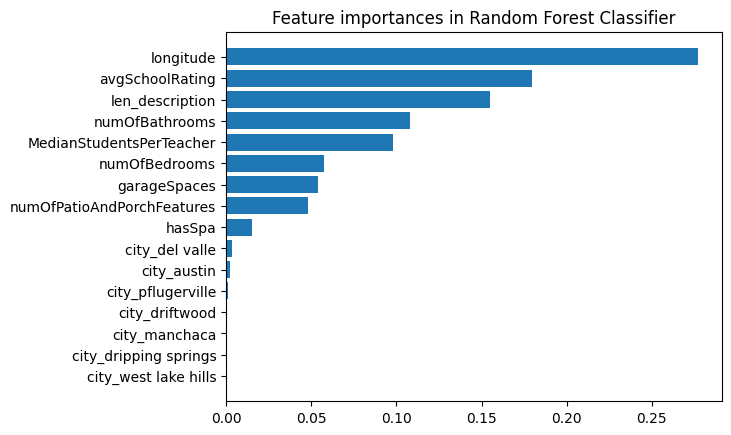

In [72]:
plt.title('Feature importances in Random Forest Classifier')
plt.barh(importance.feature, importance.importance)
plt.show()

In [73]:
import joblib

joblib.dump(pipeline,'app/models/pipeline.joblib')

['app/models/pipeline.joblib']